In [1]:
%pip install hopsworks

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
import hopsworks
import pandas as pd

In [3]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/204950
Connected. Call `.close()` to terminate connection gracefully.


In [4]:
red_wine_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

red_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
white_wine_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

white_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Combining Red and White Wine Data Frames 

Adding wine_type feature to each data frame so we can differentiate beteen both of them. Equal to 0 for red wines, 1 for white wines. Then, we concatenate both wine data frames into one: wine_df.


In [6]:
red_wine_df['wine_type'] = 0
white_wine_df['wine_type'] = 1

# Combine the two dataframes
wine_df = pd.concat([red_wine_df, white_wine_df], ignore_index=True)
wine_df = wine_df.reset_index(drop=True)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


### Missing Values

Checking for Missing Values. As seen in the table below, all values are present, thus nothing has to be filled in.


In [7]:
print(wine_df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


In [8]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [9]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


### Exploratory Data Analysis (EDA) on the wine data

Looking at the wine data, there are 12 features now that wine_type has been added:
 * fixed acidity
 * volatile acidity
 * citric acid
 * residual sugar
 * chlorides
 * free sulfur dioxide
 * total sulfur dioxide
 * density
 * pH
 * sulphates
 * alcohol
 * wine_type
 
 and the target variable is `quality`.

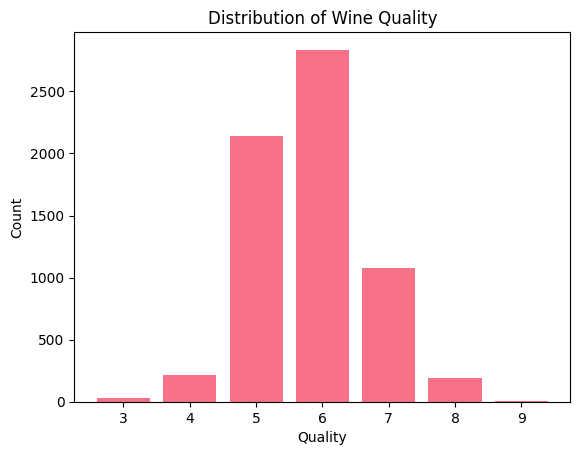

In [12]:
quality_counts = wine_df['quality'].value_counts().sort_index()
plt.bar(quality_counts.index, quality_counts.values)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

We can see the dataset ranges from 3 to 9 in terms of quality, which is the output variable. Furthermore, the middle classes have significantlt higher counts, making our dataset unbalanced. This means the model that we will use will be biased towards these middle classes, unless we use overbalancing frameworks such as SMOTE to overbalance our training data. 

### Correlation 

We can use a correlation matrix to show correlation coefficients between features. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. The higher the absoulte value of the number, the bigger the correlation between the 2 features, eihter postive or negative relationship.

<Axes: >

<Figure size 1000x800 with 0 Axes>

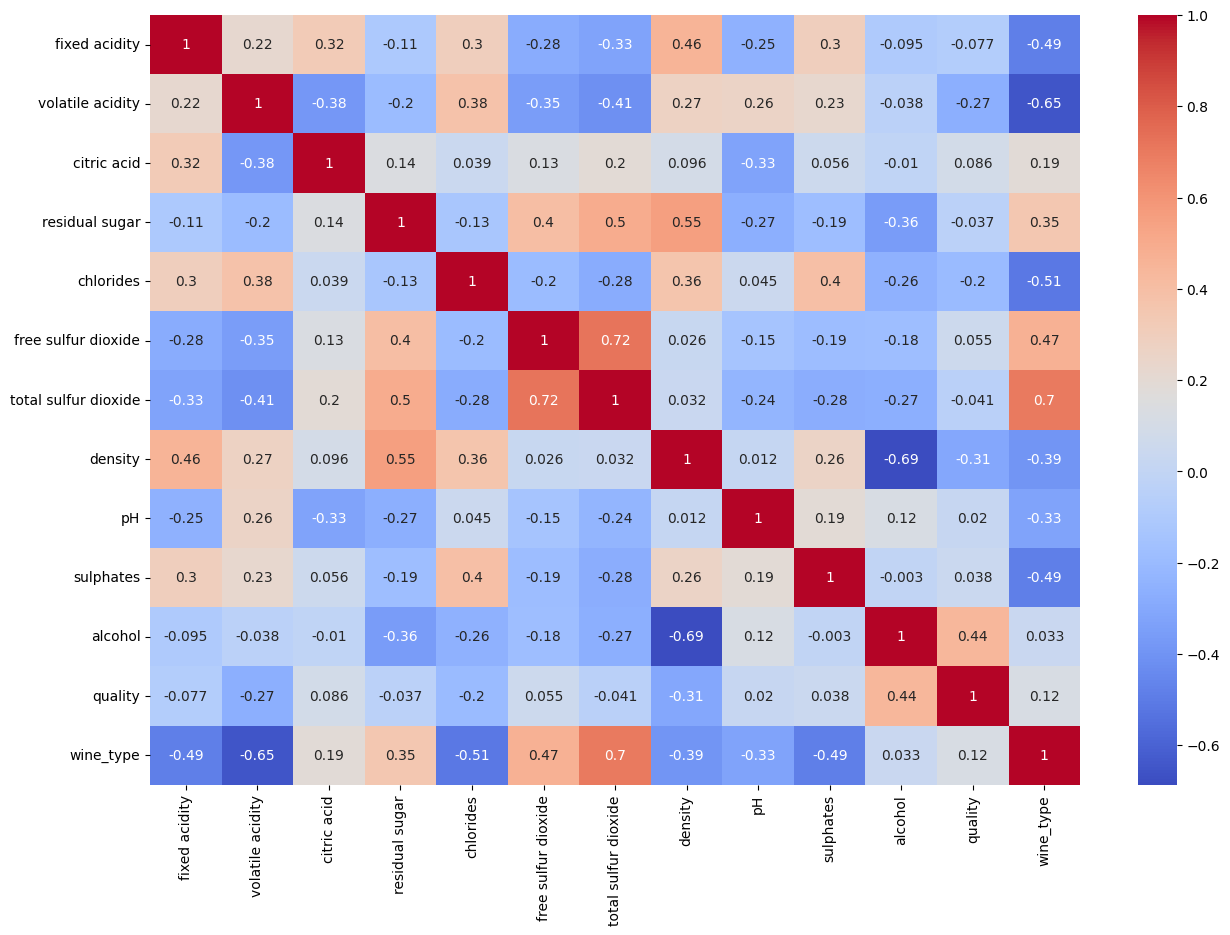

In [14]:
correlation_matrix = wine_df.corr()
plt.figure(figsize=(10, 8))
corr = wine_df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm')

As seen in the correlation matrix above. Some features are highly correlated with others. Collinearity can cause coefficients found on somes models not stable, thus we chose a correlation value of 0.7 as an indication of high correlation. There are two cases of this between two features, between total sulfur dioxide with free sulfur dioxde, and also total sulfur dioxide with wine_type. Since total sulfur dioxide appears in both, and also has the smallest correlation with the output variable quality, we decided to drop the feature.

### Visualize range of values

We can visualize the range of values for the length and width of the sepal and petal for each of the qualities to gain further knowledge on our features

2023-11-19 15:36:36,691 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-19 15:36:36,706 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


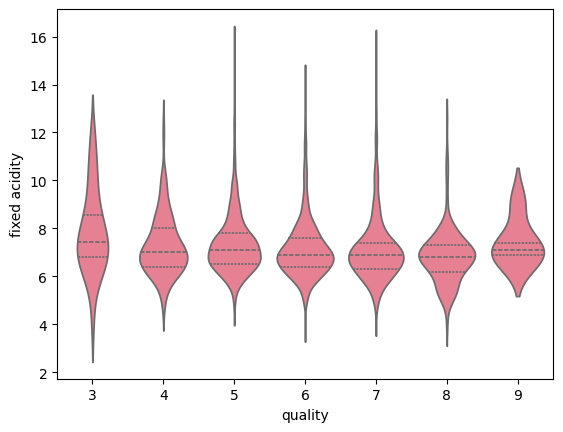

2023-11-19 15:36:36,925 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-19 15:36:36,935 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


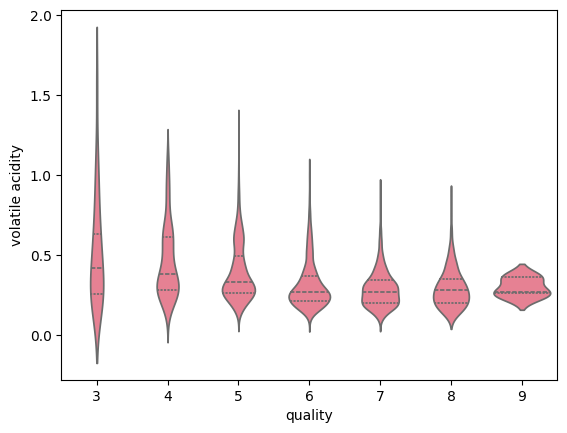

2023-11-19 15:36:37,131 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-19 15:36:37,140 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


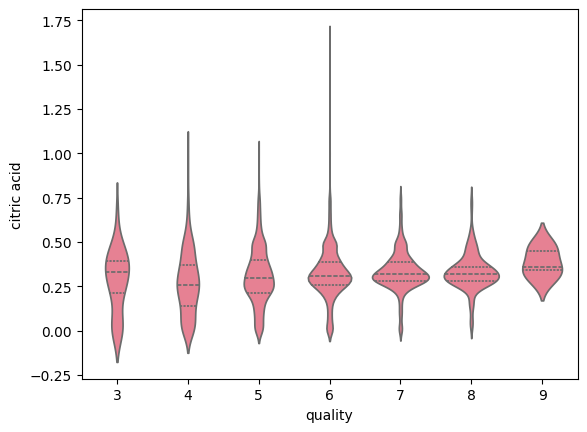

2023-11-19 15:36:37,353 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-19 15:36:37,364 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


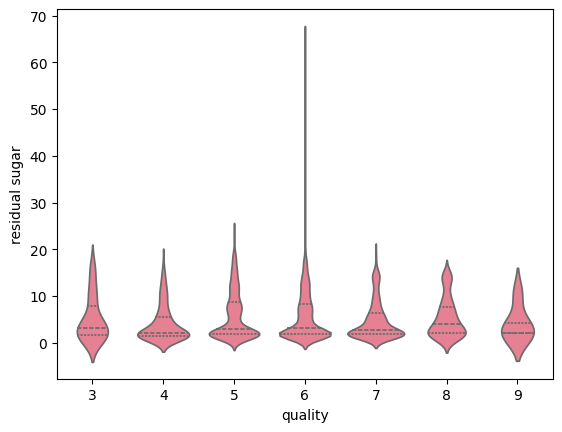

2023-11-19 15:36:37,563 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-19 15:36:37,573 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


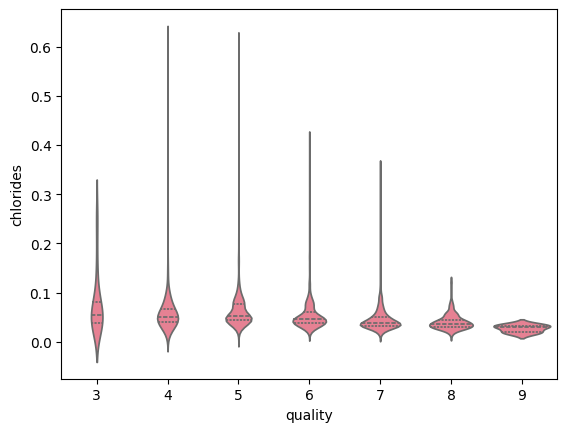

2023-11-19 15:36:37,776 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-19 15:36:37,786 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


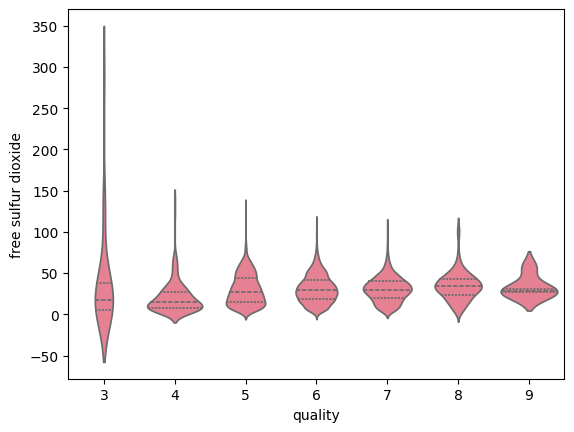

2023-11-19 15:36:37,993 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-19 15:36:38,005 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


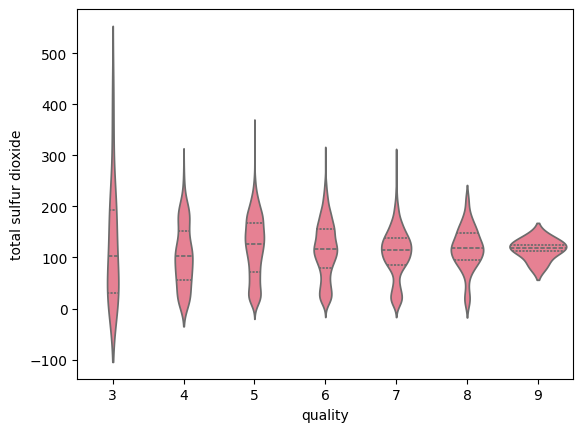

2023-11-19 15:36:38,207 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-19 15:36:38,216 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


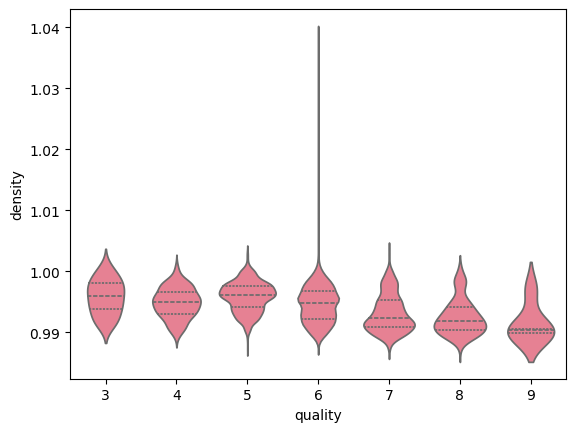

2023-11-19 15:36:38,407 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-19 15:36:38,416 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


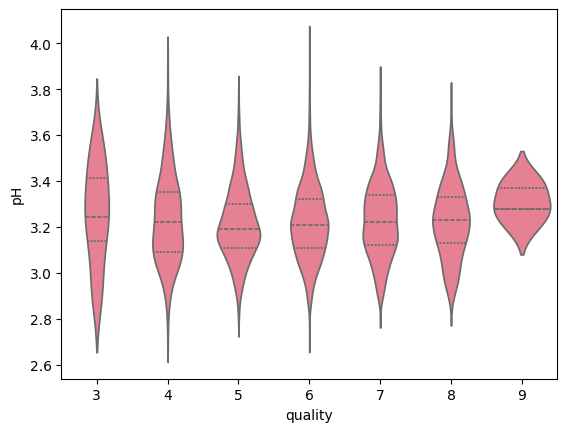

2023-11-19 15:36:38,626 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-19 15:36:38,639 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


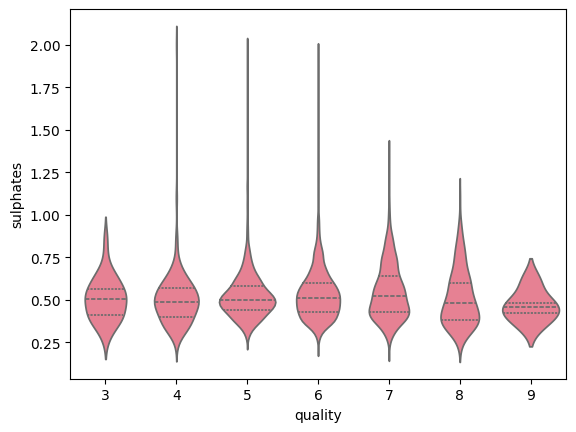

2023-11-19 15:36:38,841 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-19 15:36:38,851 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


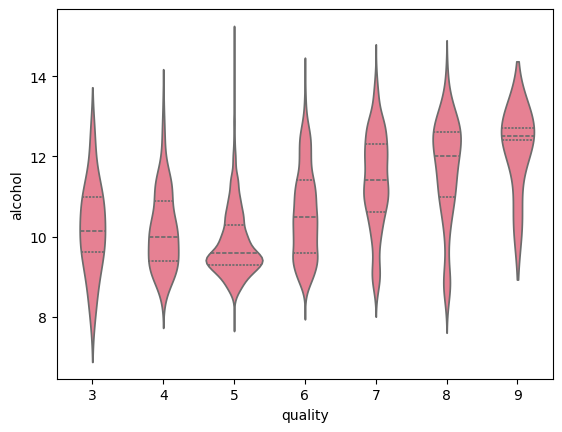

In [13]:
g = sns.violinplot(y='fixed acidity', x='quality', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='volatile acidity', x='quality', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='citric acid', x='quality', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='residual sugar', x='quality', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='chlorides', x='quality', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='free sulfur dioxide', x='quality', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='total sulfur dioxide', x='quality', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='density', x='quality', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='pH', x='quality', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='sulphates', x='quality', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='alcohol', x='quality', data=wine_df, inner='quartile')
plt.show()

As one can see in the violin plots, the realtionships between most features and quality are not very strong. Alcohol has the strongest positive relationship with qine quality, which was also supported by the correlation matrix. From our visual data, it is reasonable to think that a model may not be super accurate for predicitng wine quality.

### Insert our Iris DataFrame into a FeatureGroup
As mentioned above, total sulfur dioxide is dropped from our features. Furthermore, the names of the features are changed to fit the Hopsworks structure.

In [ ]:
wine_df = wine_df.drop(['total sulfur dioxide'], axis=1)
wine_df.columns = wine_df.columns.str.replace(' ', '_')

In [ ]:
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=["density","volatile_acidity","chlorides", "alcohol", "wine_type","fixed_acidity","citric_acid","sulphates","free_sulfur_dioxide","pH","residual_sugar"], 
    description="Wine dataset")
wine_fg.insert(wine_df)

### Data Validation
The code below will prevent new wine data from being written to the feature group if the values are outside the expected ranges.

In [ ]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [ ]:
suite = ExpectationSuite(expectation_suite_name="wine_dimensions")

expect(suite, "fixed_acidity", 3.8, 15.9)
expect(suite, "volatile_acidity", 0.08, 1.58)
expect(suite, "citric_acid", 0, 1.66)
expect(suite, "residual_sugar", 0.6, 65.8)
expect(suite, "chlorides", 0.009, 0.611)
expect(suite, "free_sulfur_dioxide", 1, 289)
expect(suite, "density", 0.98711, 1.03898)
expect(suite, "ph", 2.72, 4.01)
expect(suite, "sulphates", 0.22, 2)
expect(suite, "alcohol", 8, 14.9)
expect(suite, "wine_type", 0, 1)
red_wine_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")
